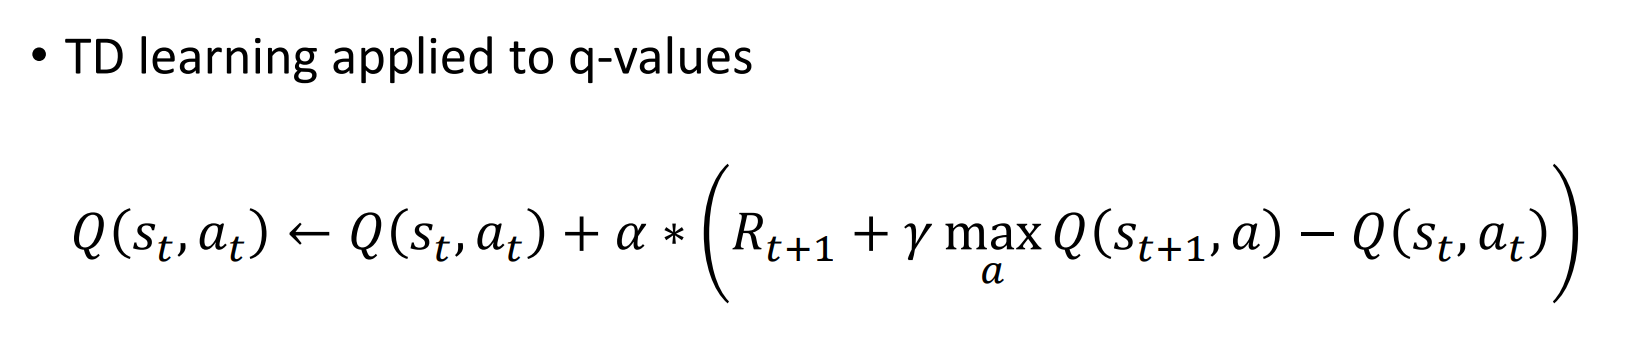
let's retake our agent's code and modify it to run autonomously :

In [18]:
from random import random
from random import randint
def run():
    questions=['Q1', 'Q2', 'Q3', 'Q4']
    # Define the probabilities and rewards based on the inputA
    probabilities = [0.9, 0.75, 0.5, 0.1]
    rewards = [100, 1000, 10000, 50000]
    total_reward=0
    rewards_reached=[]
    states_reached=[]
    actions_done=[]
    for k in range(len(questions)):
        Question = questions[k]
        states_reached.append(Question)
        Decision=randint(0,1)
        if Decision == 1: #then we play
            issue=random()
            if issue<probabilities[k]: #then you won
#                 print('You won the question',k+1)
                actions_done.append(1)
                rew = rewards[k]
                rewards_reached.append(rew)
                total_reward+=rew
            else : #then you lost
#                 print('You lost')
                actions_done.append(0)
                
                break
        else:
#             print('Quit')
            actions_done.append(0)
            break
    return(states_reached,rewards_reached,actions_done)
run()


(['Q1', 'Q2', 'Q3'], [100, 1000], [1, 1, 0])

In [22]:
import numpy as np
def TD():
    N=1000
    alpha=1/N
    gamma=1
    states=4
    actions=2
    Q=np.zeros((states,actions))
    for ini in range(N):
        states_reached,rewards_reached,actions_done=run()
#         print(states_reached,rewards_reached,actions_done)
        fail_at_last_question=False
        if len(states_reached)>1:
            if len(rewards_reached)<len(states_reached):
                #then the last question was lost
                fail_at_last_question=True
                rewards_reached.append(0)
            for state in range(len(states_reached)-1):
                max1=0.8 #for now i keep a stupid number to try to run my code
                action=actions_done[state]
                Q[state,action]=Q[state,action]+alpha*(rewards_reached[state+1]+(gamma*max1)-Q[state+1,action])
    print(Q)
TD()

[[  0.          80.92146155]
 [  0.         425.9340144 ]
 [  0.          50.0344    ]
 [  0.           0.        ]]


And here I had trouble to understand : the only moments i do the action '0' (quit or lose), so the first column of the Q matrix, it always happen at the last state, so there is no t+1 state to look at to compute?